In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from warnings import filterwarnings
filterwarnings("ignore")

# Problem 1

In [4]:
df = pd.read_csv("Wholesale+Customers+Data.csv")
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df["Total Spend"]=df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicatessen"]
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
 9   Total Spend       440 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ KB


### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [5]:
df.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000


In [6]:
df["Region"].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [7]:
df["Channel"].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [8]:
Spend = df.groupby(["Region", "Channel"]).sum().sort_values(by="Total Spend").reset_index()
Spend

,Region,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,Oporto,Hotel,8988,326215,64519,123074,160861,13516,30965,719150
1,Oporto,Retail,5911,138506,174625,310200,29271,159795,23541,835938
2,Lisbon,Retail,4069,93600,194112,332495,46514,148055,33695,848471
3,Lisbon,Hotel,14026,761233,228342,237542,184512,56081,70632,1538342
4,Other,Retail,16006,1032308,1153006,1675150,158886,724420,191752,4935522
5,Other,Hotel,48020,2928269,735753,820101,771606,165990,320358,5742077


<function matplotlib.pyplot.show(close=None, block=None)>

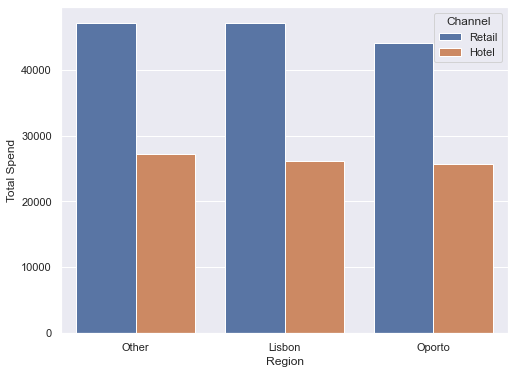

In [6]:
plt.figure(figsize=(8,6))
sns.barplot(x="Region", y="Total Spend", hue="Channel", data=df, ci=None)
plt.show

In [26]:
Total_Region=df.groupby('Region') ['Total Spend'].sum()
Total_Region

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Spend, dtype: int64

In [27]:
Total_Channel=df.groupby('Channel') ['Total Spend'].sum()
Total_Channel

Channel
Hotel     7999569
Retail    6619931
Name: Total Spend, dtype: int64

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

<function matplotlib.pyplot.show(close=None, block=None)>

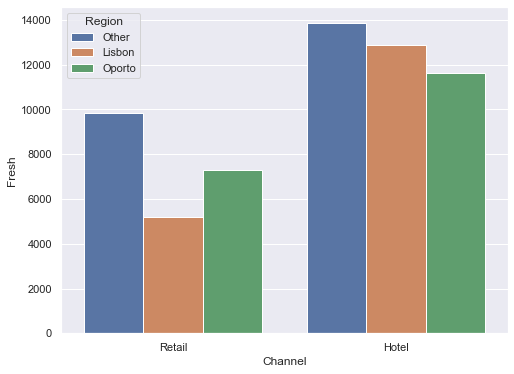

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Fresh", hue="Region", data=df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

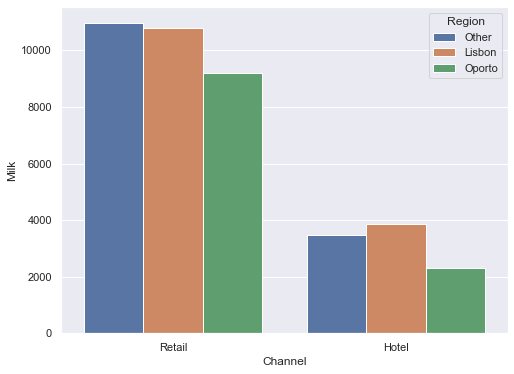

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Milk", hue="Region", data=df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

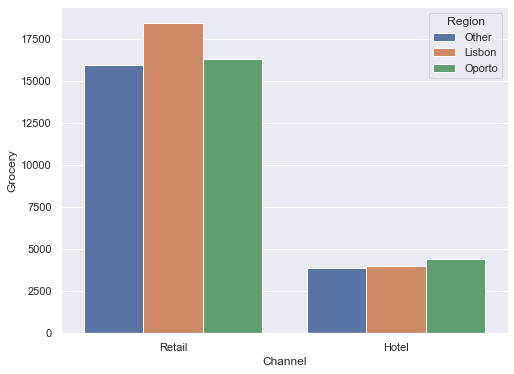

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Grocery", hue="Region", data=df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

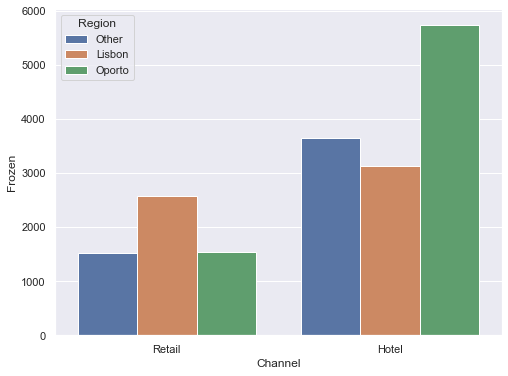

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Frozen", hue="Region", data=df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

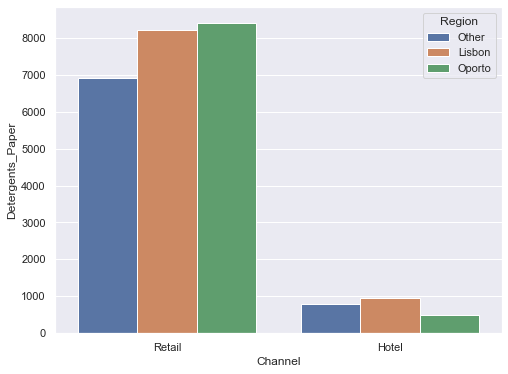

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Detergents_Paper", hue="Region", data=df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

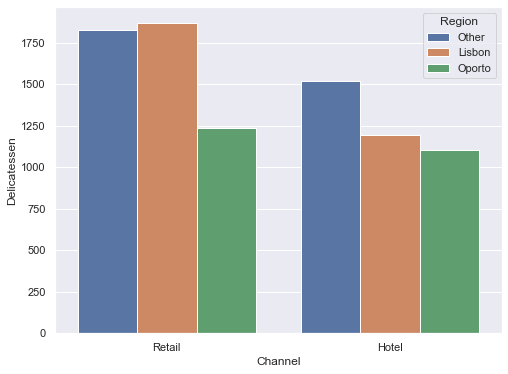

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Delicatessen", hue="Region", data=df, ci=None)
plt.show

### On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [33]:
df1 = (df.drop(['Buyer/Spender', 'Channel', 'Region', 'Total Spend'], axis=1)).describe()
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [34]:
df1.loc["CoV"] = df1.loc["std"]/df1.loc["mean"]
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
CoV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


### Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

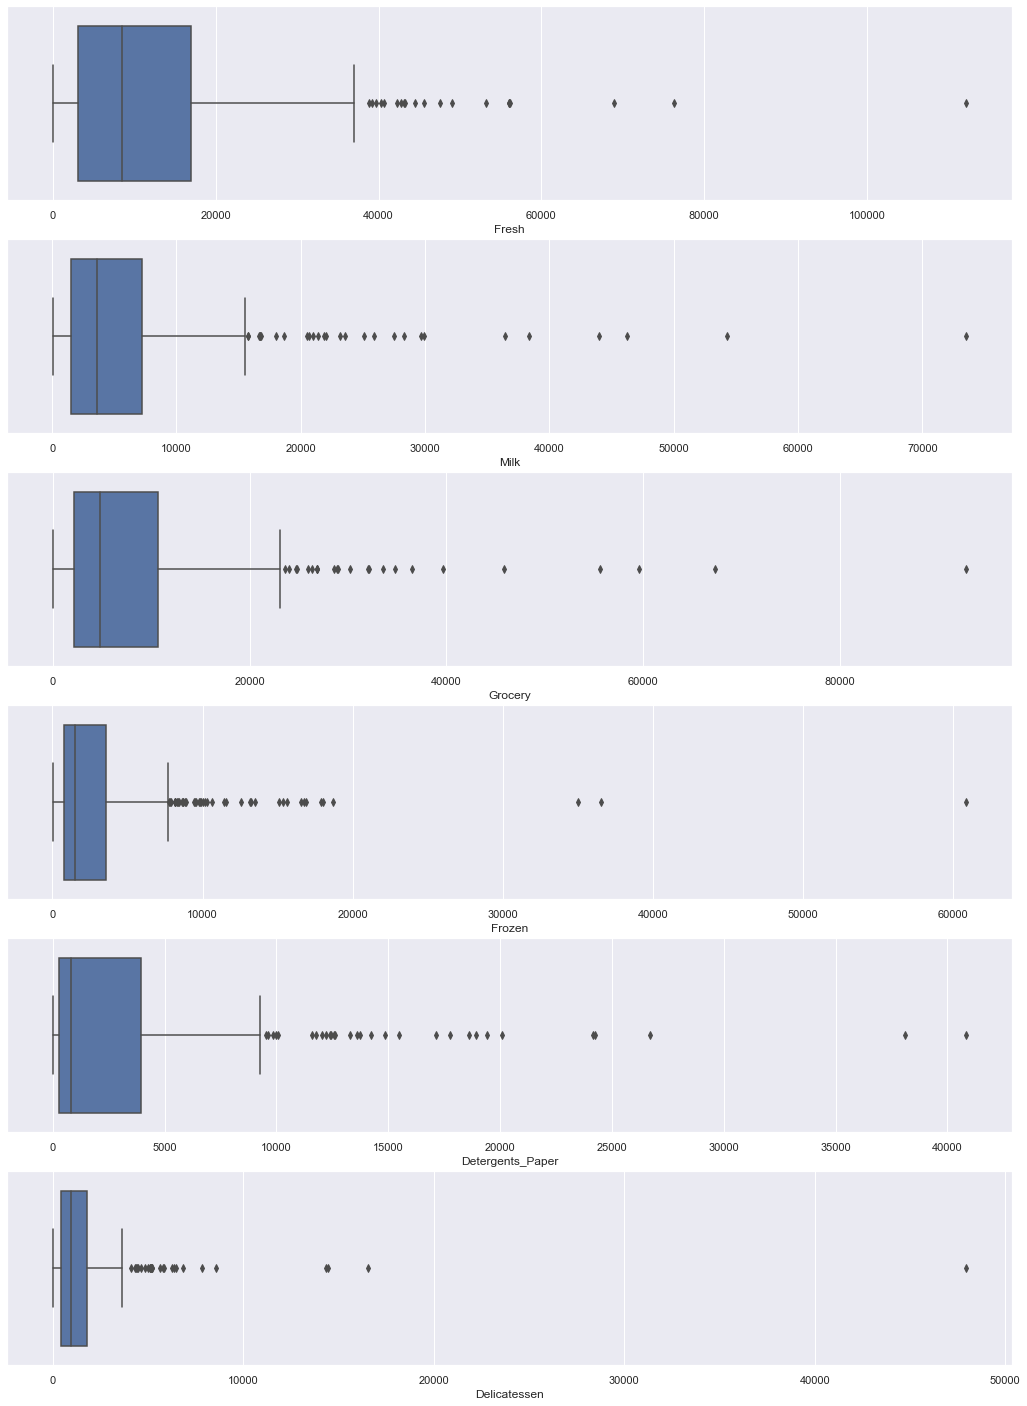

In [57]:
plt.figure(figsize= (18,25))
plt.subplot(6,1,1)
sns.boxplot(x= df['Fresh'])
plt.subplot(6,1,2)
sns.boxplot(x= df['Milk'])
plt.subplot(6,1,3)
sns.boxplot(x= df['Grocery'])
plt.subplot(6,1,4)
sns.boxplot(x= df['Frozen'])
plt.subplot(6,1,5)
sns.boxplot(x= df['Detergents_Paper'])
plt.subplot(6,1,6)
sns.boxplot(x= df['Delicatessen'])
plt.show()

# Problem 2

In [58]:
df2 = pd.read_csv('Survey-1.csv')
df2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

#### 2.1.2. Gender and Grad Intention

#### 2.1.3. Gender and Employment

#### 2.1.4. Gender and Computer

In [4]:
pd.crosstab(df2['Gender'],df2['Major'],margins =True).T

Gender,Female,Male,All
Major,,,
Accounting,3,4,7
CIS,3,1,4
Economics/Finance,7,4,11
International Business,4,2,6
Management,4,6,10
Other,3,4,7
Retailing/Marketing,9,5,14
Undecided,0,3,3
All,33,29,62


In [5]:
pd.crosstab(df2['Gender'],df2['Grad Intention'],margins =True).T

Gender,Female,Male,All
Grad Intention,,,
No,9,3,12
Undecided,13,9,22
Yes,11,17,28
All,33,29,62


In [6]:
pd.crosstab(df2['Gender'],df2['Employment'],margins =True).T

Gender,Female,Male,All
Employment,,,
Full-Time,3,7,10
Part-Time,24,19,43
Unemployed,6,3,9
All,33,29,62


In [7]:
pd.crosstab(df2['Gender'],df2['Computer'],margins =True).T

Gender,Female,Male,All
Computer,,,
Desktop,2,3,5
Laptop,29,26,55
Tablet,2,0,2
All,33,29,62


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [59]:
Total_Males = (df2['Gender'] =='Male').sum()
Total_Males

29

In [60]:
Total_Gender = df2['Gender'].value_counts().sum()
Total_Gender

62

In [62]:
Probablity_of_Male = ((Total_Males/Total_Gender))
print("The probability of a randomly selected student will be male is", Probablity_of_Male)

The probability of a randomly selected student will be male is 0.46774193548387094


In [64]:
Total_Females = (df2['Gender'] =='Female').sum()
Total_Females

33

In [65]:
Probablity_of_Female = ((Total_Females/Total_Gender))
print("The probability of a randomly selected student will be male is", Probablity_of_Female)

The probability of a randomly selected student will be male is 0.532258064516129


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [14]:
pd.crosstab(df2['Gender'], df2['Major'],margins =True).T

Gender,Female,Male,All
Major,,,
Accounting,3,4,7
CIS,3,1,4
Economics/Finance,7,4,11
International Business,4,2,6
Management,4,6,10
Other,3,4,7
Retailing/Marketing,9,5,14
Undecided,0,3,3
All,33,29,62


In [38]:
print("Accounting in Males:", 4/29)
print("CIS in Males:", 1/29)
print("Economics/Finance in Males:", 4/29)
print("International Business in Males:", 2/29)
print("Management in Males:", 6/29)
print("Retailing/Marketing in Males:", 5/29)
print("Undecided in Males:", 3/29)
print("Others in Males:", 4/29)
print("")
print("Accounting in Females:", 3/33)
print("CIS in Females:", 3/33)
print("Economics/Finance in Females:", 7/33)
print("International Business in Females:", 4/33)
print("Management in Females:", 4/33)
print("Retailing/Marketing in Females:", 9/33)
print("Undecided in Females:", 0/33)
print("Others in Females:", 3/33)

Accounting in Males: 0.13793103448275862
CIS in Males: 0.034482758620689655
Economics/Finance in Males: 0.13793103448275862
International Business in Males: 0.06896551724137931
Management in Males: 0.20689655172413793
Retailing/Marketing in Males: 0.1724137931034483
Undecided in Males: 0.10344827586206896
Others in Males: 0.13793103448275862

Accounting in Females: 0.09090909090909091
CIS in Females: 0.09090909090909091
Economics/Finance in Females: 0.21212121212121213
International Business in Females: 0.12121212121212122
Management in Females: 0.12121212121212122
Retailing/Marketing in Females: 0.2727272727272727
Undecided in Females: 0.0
Others in Females: 0.09090909090909091


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [39]:
pd.crosstab(df2['Gender'],df2['Grad Intention']).T

Gender,Female,Male
Grad Intention,,
No,9,3
Undecided,13,9
Yes,11,17


In [66]:
print("Probability of a randomly chosen student to be male who intend to graduate:", 17/29)

Probability of a randomly chosen student to be male who intend to graduate: 0.5862068965517241


In [41]:
df2['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [42]:
pd.crosstab(df2['Gender'],df2['Computer']).T

Gender,Female,Male
Computer,,
Desktop,2,3
Laptop,29,26
Tablet,2,0


In [72]:
print("Probability of a randomly chosen student to be female and does not have a laptop:", 4/33)

Probability of a randomly chosen student to be female and does not have a laptop: 0.12121212121212122


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [44]:
Full_Time_Employees = (df2['Employment'] =='Full-Time').sum()
Full_Time_Employees

10

In [45]:
pd.crosstab(df2['Gender'],df2['Employment']).T

Gender,Female,Male
Employment,,
Full-Time,3,7
Part-Time,24,19
Unemployed,6,3


In [73]:
print("Probability of a randomly chosen student is a male is", 29/62)

Probability of a randomly chosen student is a male is 0.46774193548387094


In [74]:
print("Probability of a randomly chosen student is a full time employee is", 10/62)

Probability of a randomly chosen student is a full time employee is 0.16129032258064516


In [75]:
print("Probability of a randomly chosen student is a male or has full-time employment is", (((29/62)+(10/62))-(7/62)))

Probability of a randomly chosen student is a male or has full-time employment is 0.5161290322580645


In [49]:
pd.crosstab(df2['Gender'],df2['Major']).T

Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


In [76]:
print("Probability of a randomly chosen female student is majoring in International Business or Management is", (4+4)/33)

Probability of a randomly chosen female student is majoring in International Business or Management is 0.24242424242424243


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [25]:
Contingency_Table1 = df2.drop(df2[df2['Grad Intention'] == 'Undecided'].index)
Contingency_Table1.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


In [52]:
pd.crosstab(df2['Gender'], Contingency_Table1['Grad Intention'],margins =True).T

Gender,Female,Male,All
Grad Intention,,,
No,9,3,12
Yes,11,17,28
All,20,20,40


In [53]:
pd.crosstab(df2['Gender'], Contingency_Table1['Grad Intention'], normalize='index').T

Gender,Female,Male
Grad Intention,,
No,0.45,0.15
Yes,0.55,0.85


In [54]:
print("Probability that a randomly selected student is a female is", 20/40)

Probability that a randomly selected student is a female is 0.5


In [77]:
print("Probability that a randomly selected female student intends to graduate is", 11/20)

Probability that a randomly selected female student intends to graduate is 0.55


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [56]:
LessThanThreeGPA = (df2['GPA'] < 3.0).sum()
LessThanThreeGPA

17

In [57]:
df2["Gender"].value_counts().sum()

62

In [58]:
print("Probability that a randomly selected student has less than 3.0 GPA is", 17/62)

Probability that a randomly selected student has less than 3.0 GPA is 0.27419354838709675


In [74]:
pd.crosstab(df2['Gender'],df2['Salary']>=50.0).T

Gender,Female,Male
Salary,,
False,15,15
True,18,14


In [78]:
print("Probability that a randomly selected male student earns 50.0 or more is", 14/29)

Probability that a randomly selected male student earns 50.0 or more is 0.4827586206896552


In [76]:
print("Probability that a randomly selected female student earns 50.0 or more", 18/33)

Probability that a randomly selected female student earns 50.0 or more 0.5454545454545454


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

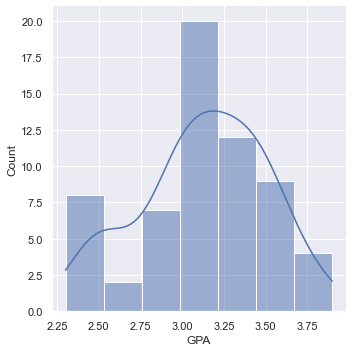

In [91]:
sns.displot(df2["GPA"], kde=True);
plt.show()

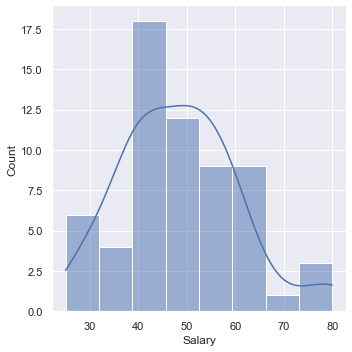

In [92]:
sns.displot(df2["Salary"], kde=True);
plt.show()

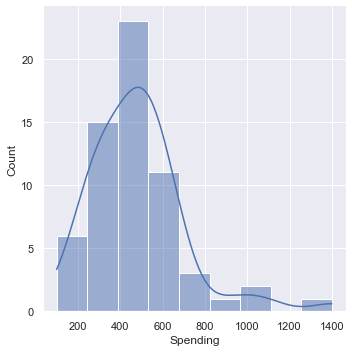

In [93]:
sns.displot(df2["Spending"], kde=True);
plt.show()

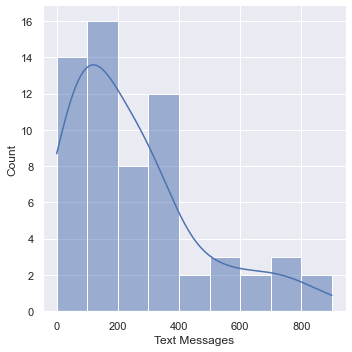

In [79]:
sns.displot(df2["Text Messages"], kde=True);
plt.show()

# Problem 3

In [84]:
df3 = pd.read_csv("A+&+B+shingles.csv")
df3.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [27]:
print("Null Hypothesis or H0: Shingle Type A is within the permissible limit that is 0.35")
print("")
print("Alternate Hypothesis or H1: Shingle Type A is not within the permissible limit that is 0.35")

Null Hypothesis or H0: Shingle Type A is within the permissible limit that is 0.35

Alternate Hypothesis or H1: Shingle Type A is not within the permissible limit that is 0.35


In [39]:
t_statistic, p_value = ttest_1samp(df3["A"], 0.35)
print('One sample t test \nt statistic: {0} p value: {1}'.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513


In [37]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value =", p_value/2)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value = 0.07477633144907513


In [28]:
print("Null Hypothesis or H0: Shingle Type B is within the permissible limit that is 0.35")
print("")
print("Alternate Hypothesis or H1: Shingle Type B is not within the permissible limit that is 0.35")

Null Hypothesis or H0: Shingle Type B is within the permissible limit that is 0.35

Alternate Hypothesis or H1: Shingle Type B is not within the permissible limit that is 0.35


In [40]:
t_statistic, p_value = ttest_1samp(df3["B"], 0.35, nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1}'.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826


In [41]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value =", p_value/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value = 0.0020904774003191826


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Assumptions:
##### 1. The datasets are normally distributed
##### 2. The variances of both the datasets are equal
##### 3. Both the datasets are independent from each other

In [43]:
print("Null Hypothesis or H0: Population Mean of Type A Shingle = Population Mean of Type B Shingle")
print("")
print("Alternate Hypothesis or H1: Population Mean of Type A Shingle != Population Mean of Type B Shingle")

Null Hypothesis or H0: Population Mean of Type A Shingle = Population Mean of Type B Shingle

Alternate Hypothesis or H1: Population Mean of Type A Shingle != Population Mean of Type B Shingle


In [85]:
t_statistic, p_value  = ttest_ind(df3['A'],df3['B'],nan_policy='omit')
print('tstat',t_statistic)
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


In [86]:
print ("Two-sample t-test p-value=", p_value)

alpha_level = 0.05 #Level of Significance

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean of both the shingles are not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean of both the shingles are equal.')

Two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the mean of both the shingles are equal.
